<a href="https://colab.research.google.com/github/ZofiaLandowska/notes/blob/main/Day19_Artificial_Neural_Networks_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day
## Aritificial Neural Networks (Code)

#### CS167: Machine Learning, Spring 2023

Thursday, April 6th, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- Quiz #2--now due Thursday, April 6th by 11:59pm.
- [Notebook #5](https://classroom.github.com/a/fwi3w_xb) due Thursday April 6th, by 11:59pm.

## Load your data:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas
#path = 'datasets/irisData.csv'
path = '/content/drive/MyDrive/irisData.csv'
data = pandas.read_csv(path)

## Quick Review:

# Deep Learning

Up until this point, every model that we've talked about (knn, decision trees, random forests, support vector machines, principal component analysis, etc) are often referred to as _traditional_ machine learning modles. 

__Deep Learning__: is a subset of machine learning that relies primarily on neural networks, and most of what is considered AI today is accomplished with deep learning. Examples:
- recognizing objects
- speech transaltion
- generating art and music
- recommendation algorithms
- and many many more

## Multilayer Perceptrons

Neural networks come in many varieties:
- __Convolutional Neural Networks (CNNs)__ are particularly good at computer-vision tasks such as the one we just talked about
- __Recurrent Neural Networks (RNNS)__ are great at working with time-series data--speech recognition, natural language processing, etc.
- __Generative Adversarial Networks (GANs)__ are great at generating new things--art, music, etc. 

The first step in understading these awesome neural networks is understanding the simplest neural network, a __multilayer perceptron__.

# A Simple Neural Network:

A __multilayer perceptron__ is the simplest type of neural network. It consists of perceptrons (aka nodes, neurons) arranged in layers. 

State of the art neural networks often contain >100 layers, hence, the term __deep learning__.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day18_mlp1.png?raw=1" width=500/>
</div>

[image source](https://github.com/jeffprosise/Applied-Machine-Learning/blob/main/Chapter%208/Multilayer%20Perceptron.ipynb)

## 🚨🚨Terminology Alert 🚨🚨
- the __depth__ of the network is the number of layers
- the __width__ of the network is the number of neurons in each layer, which can be different for every layer.
- the first layer is the __input layer__
- the last layer is the __output layer__
- all the layers in between are called the __hidden layers__

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day18_mlp1.png?raw=1" width=500/>
</div>

## Final output node: 

| **Activation Function**   | **Function**                                       | **Lower bound** | **Upper bound** | **Type of Machine Learning**               |
|---------------------------|----------------------------------------------------|-----------------|-----------------|--------------------------------------------|
| Linear                    | $f(z) = az$                                        | $-\infty$       | $\infty$        | regression where results can be negative   |
| Rectified Linear Unit     | $relu(z) = max(0,z)$                               | 0               | $\infty$        | regression where results can't be negative |
| Hyperbolic Tangent (tanh) | $tanh(z) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$      | -1              | 1               | binary classification                      |
| Sigmoid                   | $sigmoid(z) = \frac{1}{1 + e^{-z}}$                | 0               | 1               | binary classification                      |
| Softmax                   | $softmax(z_i) = \frac{exp(z_i)}{\sum_{j} exp(z_j)}$ | 0               | 1               | multiclass classification                  |

## 🙋 PollEverywhere 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day19_ann_iris.png?raw=1" width=800/>
</div>

Questions:
- what kind of machine learning is happening here? classification or regression? If classification, what kind? -> classification 
- What is the width of each of the hidden layers? h1, h2, h3 -> 6 ; 6 ; 4
- What is the depth of this neural network? (how many hidden layers are there?) -> 3 layers
- How many nodes are in the input layer? Why? -> 4 (features)
- How many nodes are in the output layer? Why? -> 3 (classes)
- What should the activation function be for the output layer? Why? -> softmax
- What should the activation function be for the rest of the layers? Why? -> relu
- How do you know what species of iris is predicted from this model? -> the highest weight / probability 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day19_ann_titanic.png?raw=1" width=800/>
</div>

Questions:
- What kind of machine learning is going on here? classification or regression? How do we know? -> binary classification
- How many nodes are in the input layer? Why? -> 3 (input features)
- How many nodes are in the output layer? Why? -> 1 (binary classification)
- What should the activation function be for the output layer? Why? -> sigmoid
- What should the activation function be for the rest of the layers? Why? -> relu

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day19_ann_vehicles.png?raw=1" width=800/>
</div>

Questions:
- What kind of machine learning is going on here? classification or regression? How do we know? -> regression 
- How many nodes are in the input layer? Why? -> 3
- How many nodes are in the output layer? Why? -> 1
- What should the activation function be for the output layer? Why? -> relu
- What should the activation function be for the rest of the layers? Why? -> relu

# ✨ New Material

| **Hyperparameter**         | **Typical Value**                                             |
|:----------------------------|:---------------------------------------------------------------|
| # input neurons            | one per input feature                                         |
| # hidden layers            | depends on the complexity of the problem, but generally 1-5    |
| # neurons per hidden layer | depends on the problem, ,but typically 10-100                  |
| # output neurons           | 1 per prediction dimension                                    |
| hidden activation          | generally ReLU                                                |
| output activation          | depends on the type of problem, see activation function table |
| loss function              | MSE                                                           |

[ch 10: Hands on ML with sklearn, Keras and Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)

## 🚨🚨Terminology Alert 🚨🚨
The process of computing the outputs of training examples is called __forward propagation__ (aka the forward step).

The process of refining the weights of a neural network over the course of many epochs is called __backpropagation__.

__feedforward neural network__: A neural network where information only flows from input to output--there are no loops or parts that flow backwards (this is not always the case)

__fully connected neural network__: (aka __dense network__)  a neural network where all of the nodes in one layer are connected to all of the nodes in both the previous and next layer (this is not always the case).

# How are Neural Networks Trained?

__Weights__ $(w_0, w_1, ... w_n)$
- trainable parameters
- learned from the training data

The goal is to __minimize the error__ predicted by the model. 

After given an initial set of weights, how can we update the weights in the 'right direction'?
- take the _derivative_ of the error function and use the derivative in the update rule to update the set of weights in the next epoch.

Recall: 
- Perceptron training rule:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_updaterule.png?raw=1" width=400/>
</div>

For multilayer peceptrons, our update rule becomes:
$$w \leftarrow w - \eta \frac{\partial E}{\partial w}$$

Where $\eta$ is the learning rate, $E$ is the Error function, and $w$ is the weights.

# Backpropagation:

__backpropagation__ tunes the weights over a neural network using __gradient descent__ to iteratively reduce the error in the network.

![backprop gif](https://thumbs.gfycat.com/BitesizedWeeBlacklemur-max-1mb.gif)

[image source](https://gfycat.com/gifs/search/backpropagation)

![backprop gif2](https://miro.medium.com/proxy/1*mTTmfdMcFlPtyu8__vRHOQ.gif)

[image source](https://www.kdnuggets.com/2019/10/introduction-artificial-neural-networks.html)

## Overfitting

Neural networks, like many machine learning models, are suceptible to __overfitting__.

How can we recognize overfitting?

Given the graph below, at what point do you think our model started overfitting? -> around 10000 (starts memorazinng the data isted of learing it; that's where you stop the training)

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day18_overfit.png?raw=1" width=800/>
</div>


## Overfitting

__overfitting__ happens when the _training set error_ continues to improve, but the _validation (testing) set error_ starts to worsen (increase). 

So... how do we know when to stop training our model to avoid overfitting?

## Overfitting

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day18_overfit2.png?raw=1" width=800/>
</div>


# Neural Network Summary

Neural Networks are effective in __finding non-linear patterns__ in the training data.
- can be applied to __regression__ or __classification__.
- __backpropagation__ tunes the weights over a neural network using __gradient descent__ to iteratively reduce the error in the network. 
- __Overfitting__ the training data is common and is important to avoid.
- The following parameters shoudl be tuned when using neural networks:
    - number of epochs
    - structure of the network (depth, width)
    - activation function
    - eta (learning rate)


## MLP Code

Last thing we'll use from `sklearn`. 

In [5]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas
#path = 'datasets/irisData.csv'
path = '/content/drive/MyDrive/irisData.csv'
data = pandas.read_csv(path)
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

#Split the dataset
predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

## Build a MLP using `sklearn`

Accuracy:  0.9


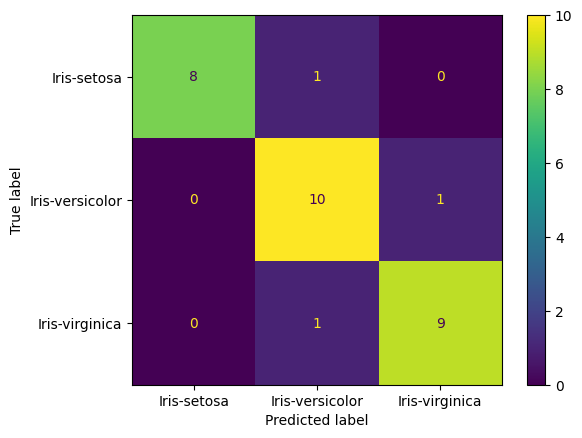

In [8]:
# Set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

# Confusion Matrix
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pre " + vals))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

# 💬 Goup Exercise:
## In-Class Exercise #1:

1. Read in the Boston Housing dataset
2. Normalize your data
3. Use a [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to predict the price of a house 'MEDV'
4. Play around with changing the parameters, see what the best R2 score you can get is. 


In [9]:
# Your code goes here for the In-Class Exercise
# 1. Read in the Boston Housing dataset
import pandas
#path = 'datasets/boston_housing.csv' 
path = '/content/drive/MyDrive/boston_housing.csv'
housing_data = pandas.read_csv(path) 

# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

#Split the dataset
predictors = housing_data.columns.drop('MEDV')
target = "MEDV"
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=0)


In [10]:
#2. Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)


In [11]:
#3. Use a MLPRegressor to predict the price of a house 'MEDV'
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("R2 score: ", metrics.r2_score(test_sln,predictions))


R2 score:  0.6981778639733168


In [12]:
#4. Play around with the parameters
mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (500,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("R2 score: ", metrics.r2_score(test_sln,predictions))

R2 score:  0.7304195310541088


# Introducing Deep Learning Frameworks

Deep Learning Frameworks: libraries that make implementing deep learning easier--building models, training them, visualizing the data and training process, saving/loading models, utilizing GPU, etc.
- Tensorflow, Keras
- PyTorch
- Jax
- MXNet
- Matlab



## Common DL Frameworks:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day19_dl_frameworks.png?raw=1" width=800/>
</div>

[image source](https://www.kaggle.com/getting-started/156399)

# Building Neural Networks with Keras and Tensorflow:

For this class, we'll be using Tensorflow, and the library that is built to make Tensorflow simpler--Keras.

To build a neural network using Keras, we'll use the [`Sequential`](https://keras.io/api/models/sequential/) API. It looks something like this:
1. Create an instance of the `Sequential` class
2. call `add` on the `Sequential` object to add layers. 
    - The layers are instances of classes such as [`Dense`](https://keras.io/api/layers/core_layers/dense/), which represents a fully connected layer with a specified number of neurons.

In [13]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# step 1: create an instance of the sequential class
model = Sequential()

#step 2:  call add on the sequential object to add layers
model.add(Dense(3, activation='relu', input_dim=2)) #regression
model.add(Dense(1))

This model contains the following:
- an input layer with 2 neurons
- a hidden layer with three neurons
- an output layer with one neuron. 

Values passed from the hidden layer to the output layer are transformed by the ReLu activation function, which turns negative numbers onto 0s, and heps the model fit to nonlinear datasets.

> Notice that you don't have to add the input layer explicitly, the `input_dim=2` parameter in the first hidden layer implicitly creates an input layer with 2 neurons.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Compiling your model:

Once you've built your model, your next step is to call `compile` and specify important attributes such as which optimizer and loss function to use during training.

Here's an example:

In [15]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

Let's walk through these parameters:
- `optimizer= 'adam'` : this tells Keras that we will use the [`Adam`](https://keras.io/api/optimizers/adam/) optimizer to adjust weights and biases in each backpropagation pass during training. Adam is one of [eight optimizers built into Keras](https://keras.io/api/optimizers/) and is a pretty good choice to start.

- `loss = 'mae'`: tells Keras to use the mean absolute error (MAE) to measure how well our model is doing (as the loss function). This is common for neural networks intended to solve regresion problems. Another commmon option here is `loss='mse'` for mean squared error (MSE)

- `metrics = ['mae']`: tells Keras to capture MAE values as the network is trained. This information is used after training is complete to judge the efficacy of the training.

## Next Step:
Inside the `compile` method, Keras builds a TensorFlow object graph to speed up execution. Once the network is compiled, you can train it by calling `fit`. 

In [16]:
#this will give an error because we didn't load data ahead of time.
hist = model.fit(x,y, epochs=100, batch_size=100, validation_split=0.2)

NameError: ignored

The `fit` method accepts many parameters, Here are the ones used above:
- `x`, the dataset's feature columns.
- `y`, the dataset's label column--the one containing th values the network will attempt to predict.
- `epochs=100`, tells keras to train the network for 100 iterations
- `batch_size=100`, tells keras to pass 100 training samples through the network before making a backpropagation pass to adjust the weights and biases.
- `validation_split=0.2`, tells keras that in each epoch, it should train with 80% of the rows in the dataset and validate the networks accuracy with the remaining 20%. 

## Get Predictions

Once a neural network is trained, you call it's `predict` method to make a prediction:

In [ ]:
prediction = model.predict(np.array[[2,2]])

In this example, the network accepts two floating-point values as input and returns a single floating-point value as output. The value returned by `predict` is that output.

## Using the GPU in Google Colab:

Go ahead and go up to 'Runtime', and select 'change runtime type' from the dropdown list, select 'GPU'. If you complete this step correctly, the following code should say `Found GPU at: /device:GPU:0` or something similar.

In [17]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Training a Neural Network to Predict Taxi Fares:

Download `taxi-fares.csv` from Blackboard and put it in your Google Drive. This data is from the New York City Taxi and LImousine Commision and includes data about taxi fares.

Let's start by loading in our dataset and doing some pre-processing.

In [18]:
import pandas as pd
#path = 'datasets/taxi-fares.csv'
path = '/content/drive/MyDrive/taxi-fares.csv'
df = pd.read_csv(path, parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


## Data Prep:

For a full explanation, [see here](https://github.com/jeffprosise/Applied-Machine-Learning/blob/main/Chapter%202/Regression%20(Taxi%20Fares).ipynb)

In [19]:
from math import sqrt
 
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
 
for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
 
df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)
 
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


## Build our model:
Things to consider:
- What should the `input_dim` be?
- How many hidden layers?
- How many neurons per layer?
- What activation to use for hidden layers?
- How many output neurons?
- What activation for the output layer?


In [20]:
df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


input size: 3
output size: 1 
output activation function: relu

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               2048      
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 265,217
Trainable params: 265,217
Non-trainable params: 0
_________________________________________________________________


## Now, let's train our model:

In [22]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
187/187 [==============================] - 7s 8ms/step - loss: 2.9639 - mae: 2.9639 - val_loss: 2.5001 - val_mae: 2.5001
Epoch 2/100
187/187 [==============================] - 1s 5ms/step - loss: 2.3925 - mae: 2.3925 - val_loss: 2.4248 - val_mae: 2.4248
Epoch 3/100
187/187 [==============================] - 1s 6ms/step - loss: 2.3719 - mae: 2.3719 - val_loss: 2.3934 - val_mae: 2.3934
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 2.3686 - mae: 2.3686 - val_loss: 2.3516 - val_mae: 2.3516
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 2.3614 - mae: 2.3614 - val_loss: 2.3816 - val_mae: 2.3816
Epoch 6/100
187/187 [==============================] - 1s 3ms/step - loss: 2.3615 - mae: 2.3615 - val_loss: 2.3504 - val_mae: 2.3504
Epoch 7/100
187/187 [==============================] - 1s 4ms/step - loss: 2.3699 - mae: 2.3699 - val_loss: 2.3438 - val_mae: 2.3438
Epoch 8/100
187/187 [==============================] - 1s 4ms/step - 

[]

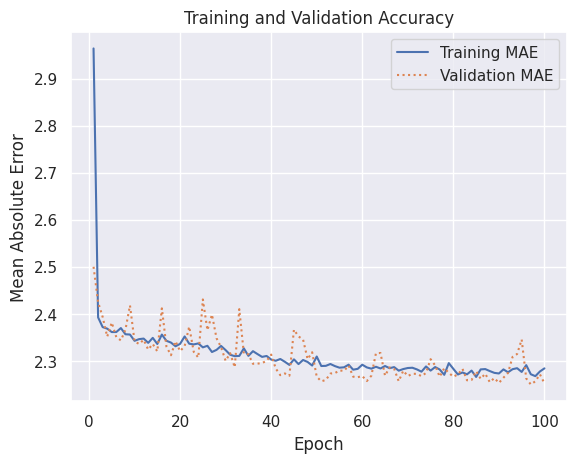

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

## Make some predictions:

Take a look at the $r^2$ score for our dataset:

In [24]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x))

729/729 [==============================] - 1s 1ms/step


0.7464336515831762

Estimate what it will cost to hire a taxi for a 2-mile trip at 5:00pm on a Friday afternoon:
- day of the week `[ Monday:0, Tuesday:1, Wednesday:2, Thursday:3, Friday:4, Saturday:5, Sunday:6]`
- time, military time
- distance in miles

In [25]:
import numpy as np

# day of the week, time, and distance
model.predict(np.array([[4, 17, 2.0]]))

1/1 [==============================] - 0s 49ms/step


array([[10.437191]], dtype=float32)

What about the same 20mile trip at 5pm on a Saturday?

In [26]:
model.predict(np.array([[5, 17, 2.0]]))

1/1 [==============================] - 0s 18ms/step


array([[10.253813]], dtype=float32)

# Iris Dataset with Keras

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy

# we're going to use the iris dataset, but load it from sklearn 
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, numpy.newaxis]).toarray()

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [2]:
# display a row of data
print(X_train_norm[0,:])
print(Y_train[0,:])

[ 0.37346331 -0.58519388  0.54075378  0.74234434]
[0. 0. 1.]


In [3]:
#build our neural network model
n_features = X.shape[1] #X generally stands for our predictors
n_classes = Y.shape[1] #Y generally stands for our target

model = Sequential(name='iris_1')
model.add(Dense(6, input_dim=n_features, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

from sklearn.metrics import r2_score

# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics=['accuracy'])
model.summary()

Model: "iris_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [4]:
# train the model
history = model.fit(X_train_norm, Y_train, validation_split=0.2, batch_size=15, epochs=100) #add verbose = 0 to make output minimal

# cross-validation; make predictions and get error
print("----"*30)
mse, acc =  model.evaluate(X_test_norm, Y_test)
print('Mean Squared Error:',mse)
print('Test accuracy:', acc)

Epoch 1/100
7/7 [==============================] - 11s 116ms/step - loss: 0.2432 - accuracy: 0.0000e+00 - val_loss: 0.2392 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 0.2424 - accuracy: 0.0000e+00 - val_loss: 0.2388 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 0.2417 - accuracy: 0.0000e+00 - val_loss: 0.2383 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 0.2410 - accuracy: 0.0000e+00 - val_loss: 0.2379 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 0.2403 - accuracy: 0.0000e+00 - val_loss: 0.2375 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.2397 - accuracy: 0.0000e+00 - val_loss: 0.2371 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 25ms/step - loss: 0.2390 - accuracy: 0.0000e+00 - val_lo

KeyboardInterrupt: ignored

## 👀 Take a closer look: 

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Boston Housing Dataset with Keras

In [ ]:
from keras.datasets import boston_housing

# we're going to use the Bosting housing dataset, but load it from keras 
housing_data = boston_housing.load_data(test_split=0.2) #it comes with it's own test/train split :) 
(X_train, Y_train), (X_test, Y_test) = housing_data

In [ ]:
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
### need to execute this to get access to RSquare function
!pip3 install tensorflow_addons

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras.losses import MeanSquaredError

#from tensorflow_addons.metrics import RSquare

#build our model
n_features = X_train.shape[1] # get the number of input values for the input layer

model = Sequential(name='boston_housing1')   #initialize the model

#add some layers. Dense is a fully connected layer
model.add(layers.Dense(64, input_dim= n_features, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

#Since we are doing a regressions, we only want one value as an ouput, so our last layer has a Dense layer with 1 neuron.
model.add(layers.Dense(1)) #default activation function is "linear"

from sklearn.metrics import r2_score
# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics= [MeanSquaredError()])
model.summary()

In [ ]:
# train the model
history = model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.1, batch_size=15, verbose=1)

print("----"*30)

# cross-validation; make predictions and get error
test_mse_score, test_r2_score = model.evaluate(X_test_norm, Y_test)
print('MSE:', test_mse_score)
print('Train MSE:', test_r2_score)

In [ ]:
history.history #this will show you what was saved in the history variable

In [ ]:
import pandas
#pandas.DataFrame(history.history).plot(figsize=(8,5), title='Boston Housing')
#plt.show()

import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# 💬 Goup Exercise #2
What parameters from the models above do you think you can/should change? 


Try these
- Change the number of neurons in each layer.  
- Add a layer to the model.
- Change the activation function of the model, [here is the documentation](https://keras.io/api/layers/activations/)
- Change the optimizer, [here is the documentation](https://keras.io/api/optimizers/) with a list of options
- look at the [metrics](https://keras.io/api/metrics/) try adding another metric.

# 💬 Goup Exercise #3

Try building the following model:
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day19_ann_titanic.png?raw=1" width=800/>
</div>



In [ ]:
# load in titanic.csv, and take a subset of the columns ['age', 'sex', 'deck', and 'survived']

In [ ]:
# build your model

In [ ]:
# train your model

In [ ]:
# make some predictions